In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import requests

sourcepath_year=Path("Resources/winemag-data_year.csv")
winey_df=pd.read_csv(sourcepath_year)
winey_df.head()

,country,taster_name,title,description,designation,points,price,province,region_1,region_2,variety,winery,year
0,Italy,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia,2013.0
1,Portugal,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos,2011.0
2,US,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,2013.0
3,US,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian,2013.0
4,US,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,2012.0


In [2]:
sourcepath_year=Path("Resources/winemag-data.csv")
wine_df=pd.read_csv(sourcepath_year)
variety_group = wine_df.groupby(['variety'], as_index=True)
variety_gp = pd.DataFrame(variety_group.mean())
variety_gp["Count"] = variety_group.count()["country"]
variety_gp.sort_values(["points"], ascending=False).head()


,points,price,Count
variety,,,
Terrantez,95.0,236.0,1
Tinta del Pais,95.0,47.5,2
Riesling-Chardonnay,94.0,40.0,1
Ramisco,93.0,495.0,1
Blauburgunder,93.0,19.0,2


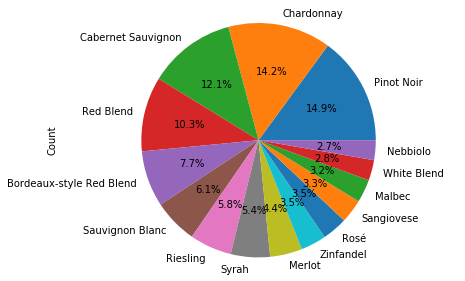

In [4]:
count = pd.DataFrame(variety_gp["Count"]).sort_values(["Count"], ascending=False).head(15)
variety_list = count.keys()
count_pie = count.plot(kind="pie", y=variety_list,autopct='%1.1f%%',legend=False)
plt.axis("equal")
plt.tight_layout()

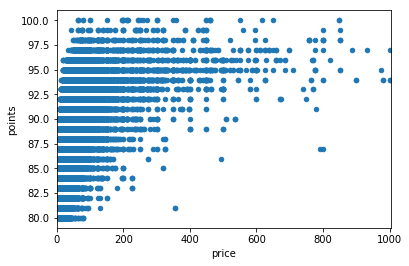

In [7]:
price_point = wine_df.plot.scatter(x='price', y='points', xlim=[0,1005])
#xlabel="Price ($)", ylabel="Points (0-100)"
#Based on the below graph, all price ranges are subject to any score, so a high score
#does not mean the price of a wine is high; however, the higher priced wines do tend to receive generally higher score
#compared to the other prices. 
# high score != high price -- high price = high score

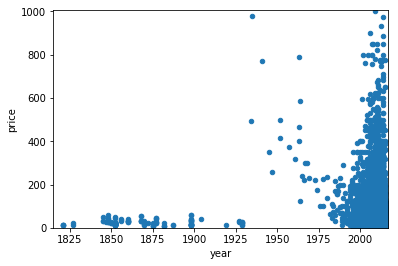

In [8]:
price_year = winey_df.plot.scatter(x='year', y='price', ylim=[0,1005], xlim=[1815,2017])
#hypothesis: the older the wine the more expensive it would be
# based on analysis, the majority of the more expensive wines cluster in more recent years

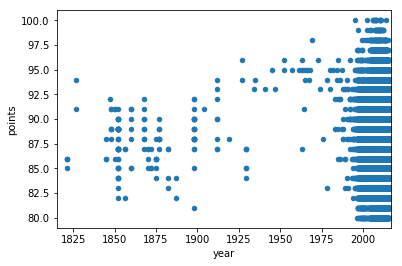

In [9]:
point_year = winey_df.plot.scatter(x='year', y='points', xlim=[1815,2017])

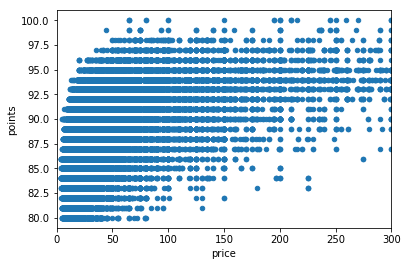

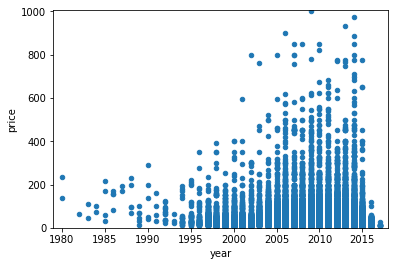

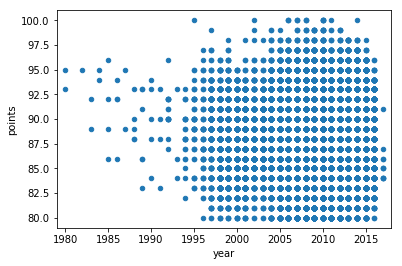

In [11]:
price_point_lim = wine_df.plot.scatter(x='price', y='points', xlim=[0,300])
price_year_lim = winey_df.plot.scatter(x='year', y='price', ylim=[0,1005], xlim=[1979,2018])
point_year_lim = winey_df.plot.scatter(x='year', y='points', xlim=[1979,2018])

<function matplotlib.pyplot.xlabel(s, *args, **kwargs)>

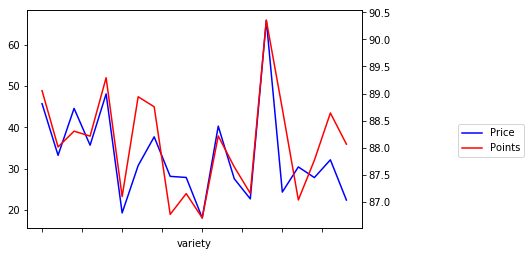

In [49]:
variety_price = pd.DataFrame(variety_gp).sort_values(["Count"], ascending=False).head(20)
fig, ax = plt.subplots()

variety_price["price"].plot(y=variety_list,ax=ax, style='b-')
variety_price["points"].plot(y=variety_list,ax=ax, style='r-', secondary_y=True)

ax.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]],\
           ['Price','Points'], bbox_to_anchor=(1.5, 0.5))

plt.xlabel

In [53]:
count = pd.DataFrame(variety_gp["Count"]).sort_values(["Count"], ascending=False).head(20)
variety_list = count.keys()
count_bar = count.plot(kind="bar", y=variety_list)

Index(['Count'], dtype='object')


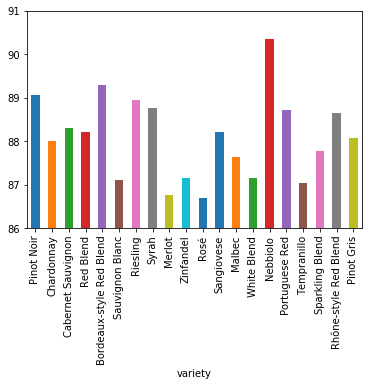

In [16]:
vpoint = variety_price["points"]
vpoint_bar = vpoint.plot(kind="bar", y=variety_list, ylim=[86,91])

In [26]:
taster_group = winey_df.groupby(['taster_name'], as_index=True)
taster_gp = pd.DataFrame(taster_group.mean())
taster_gp["Count"] = taster_group.count()["country"]
taster_gp = taster_gp.sort_values(["Count"], ascending=False).head(15)
taster_gp

,points,price,year,Count
taster_name,,,,
Roger Voss,88.708003,38.649960,1996.849253,25512
Michael Schachner,86.907493,25.231155,1990.545716,15127
Kerin O’Keefe,88.867947,41.953413,2008.904712,10776
Virginie Boone,89.213379,46.621963,1989.474743,9537
Paul Gregutt,89.082564,33.644873,1985.930003,9531
Matt Kettmann,90.008686,38.642136,2015.083175,6332
Joe Czerwinski,88.536235,35.175579,1999.858952,5145
Sean P. Sullivan,88.755739,34.085888,1974.034728,4966
Anna Lee C. Iijima,88.415629,29.790112,2009.661978,4415


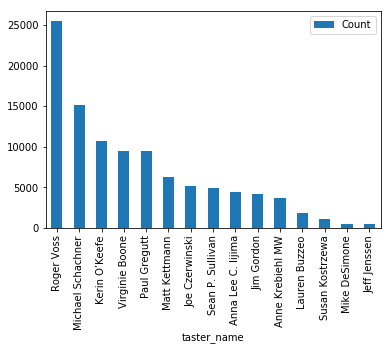

In [27]:
tg_variety_list = taster_gp.keys()
tg_bar = taster_gp.plot(kind="bar", y=variety_list)


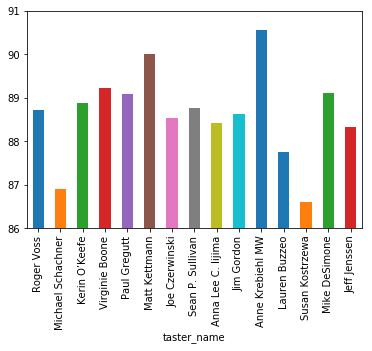

In [30]:
tgpoint = taster_gp["points"]
tgpoint_bar = tgpoint.plot(kind="bar", y=variety_list, ylim=[86,91])

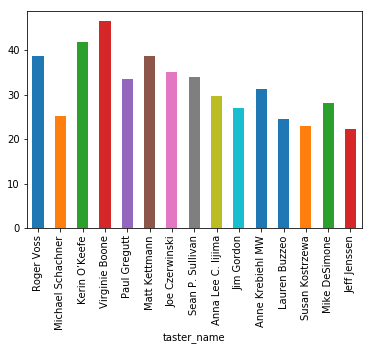

In [31]:
tgprice = taster_gp["price"]
tgprice_bar = tgprice.plot(kind="bar", y=variety_list)

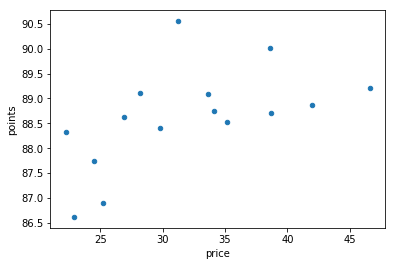

In [32]:
price_point_tg = taster_gp.plot.scatter(x='price', y='points')

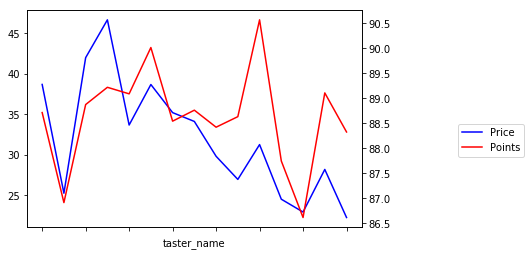

In [48]:
fig, ax = plt.subplots()

taster_gp["price"].plot(y=variety_list,ax=ax, style='b-')
taster_gp["points"].plot(y=variety_list,ax=ax, style='r-', secondary_y=True)

ax.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]],\
           ['Price','Points'], bbox_to_anchor=(1.5, 0.5))

